In [6]:
import numpy as np
import matplotlib.pyplot as plt


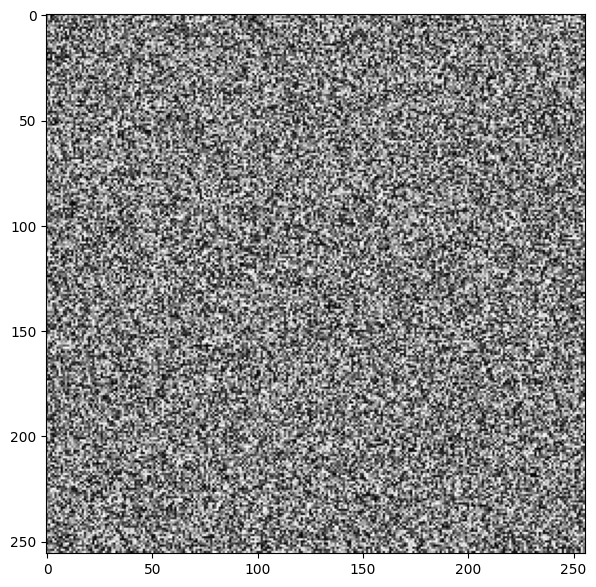

In [7]:
# generate random numpy array with values from 0 to 255 # and a size of 256x256
random_image = np.random.randint(0, 256, (256, 256))

# initialize plot
plt.figure(figsize=(7, 7))

# show grayscale image, nb: cmap, vmin and vmax
plt.imshow(random_image, cmap='gray', vmin=0, vmax=255)
plt.show()

In [8]:
random_image

array([[ 90, 193,  11, ..., 253,  39, 139],
       [ 98, 254,   5, ..., 111,  59,  16],
       [101, 188,  54, ..., 182,  40,  68],
       ...,
       [ 93, 203, 219, ...,  62, 238,  93],
       [ 73,  91,  39, ...,   5, 231, 120],
       [155, 112, 180, ...,  54, 215, 133]])

In [9]:
random_image.shape

(256, 256)

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from tqdm import tqdm


In [12]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from tqdm import tqdm

"""
data path：
https://www.kaggle.com/datasets/abhishek/siim-png-images/data
https://www.kaggle.com/datasets/abhishek/siim-png-train-csv/code
"""


def create_dataset(training_df, image_dir):
    """
    This function takes the training dataframe
    and outputs training array and labels
    :param training_df: dataframe with ImageId, Target columns
    :param image_dir: location of images (folder), string
    :return: X, y (training array with features and labels)
    """
    # create empty list to store image vectors
    images = []
    # create empty list to store targets
    targets = []

    # loop over the dataframe
    for index, row in tqdm(
            training_df.iterrows(), total=len(training_df), desc="processing images"
    ):
        # get image id
        image_id = row["ImageId"]
        # create image path
        image_path = os.path.join(image_dir, image_id)
        # open image using PIL
        image = Image.open(image_path + ".png")
        # resize image to 256x256. we use bilinear resampling
        image = image.resize((256, 256), resample=Image.BILINEAR)
        # convert image to array
        image = np.array(image)
        # ravel
        image = image.ravel()
        # append images and targets lists
        images.append(image)
        targets.append(int(row["target"]))

    # convert list of images to numpy array
    images = np.array(images)
    # print size of this array
    print(images.shape)

    return images, targets


if __name__ == "__main__":
    csv_path = "../input/train.csv"
    image_path = "../input/train_png/"

    # read CSV with imageid and target columns
    df = pd.read_csv(csv_path)

    # we create a new column called kfold and fill it with -1
    df["kfold"] = -1

    # the next step is to randomize the rows of the data
    df = df.sample(frac=1).reset_index(drop=True)

    # fetch labels
    y = df.target.values
    # initiate the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    # fill the new kfold column
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_, 'kfold'] = f

    # we go over the folds created
    for fold_ in range(1):
        # temporary dataframes for train and test
        train_df = df[df.kfold != fold_].reset_index(drop=True)
        test_df = df[df.kfold == fold_].reset_index(drop=True)

        # create train dataset
        # you can move this outside to save some computation time
        xtrain, ytrain = create_dataset(train_df, image_path)

        # create test dataset
        # you can move this outside to save some computation time
        xtest, ytest = create_dataset(test_df, image_path)

        # fit random forest without any modification of params
        clf = ensemble.RandomForestClassifier(n_jobs=-1)
        clf.fit(xtrain, ytrain)

        # predict probability of class 1
        preds = clf.predict_proba(xtest)[:, 1]

        # print results
        print(f"FOLD: {fold_}")
        print(f"AUC = {metrics.roc_auc_score(ytest, preds)}")
        print("")

processing images:   0%|▎                                                                                                                                                              | 5/2135 [00:00<00:46, 45.91it/s]

(8540, 65536)


processing images: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2135/2135 [00:38<00:00, 56.12it/s]


(2135, 65536)
FOLD: 0
AUC = 0.7262365250475585



In [3]:
!pwd

/Users/guozhiqi/Desktop/approach_to_any_ml_problem/image_classification/notebooks


### EDA

In [1]:
import pandas as pd
from sklearn import model_selection

# 创建一个示例 DataFrame
data = {
    'feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'feature2': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'target': [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)


In [2]:
df

,feature1,feature2,target
0,1,11,0
1,2,12,1
2,3,13,0
3,4,14,1
4,5,15,0
5,6,16,1
6,7,17,0
7,8,18,1
8,9,19,0
9,10,20,1


In [3]:

# 添加一个新的列 'kfold' 并初始化为 -1
df['kfold'] = -1

# 获取标签
y = df.target.values

# 初始化 StratifiedKFold 类
kf = model_selection.StratifiedKFold(n_splits=5)

# 填充新的 kfold 列
for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
    print(f"Fold {f}")
    print(f"t_, Training indices: {t_}")
    print(f"v_, Validation indices: {v_}")
    df.loc[v_, 'kfold'] = f
    
# print(df)

Fold 0
t_, Training indices: [2 3 4 5 6 7 8 9]
v_, Validation indices: [0 1]
Fold 1
t_, Training indices: [0 1 4 5 6 7 8 9]
v_, Validation indices: [2 3]
Fold 2
t_, Training indices: [0 1 2 3 6 7 8 9]
v_, Validation indices: [4 5]
Fold 3
t_, Training indices: [0 1 2 3 4 5 8 9]
v_, Validation indices: [6 7]
Fold 4
t_, Training indices: [0 1 2 3 4 5 6 7]
v_, Validation indices: [8 9]


In [4]:
df

,feature1,feature2,target,kfold
0,1,11,0,0
1,2,12,1,0
2,3,13,0,1
3,4,14,1,1
4,5,15,0,2
5,6,16,1,2
6,7,17,0,3
7,8,18,1,3
8,9,19,0,4
9,10,20,1,4


In [6]:
import torch
torch.cuda.is_available()

False